In [1]:
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pathlib
import tensorflow_datasets as tfds

In [6]:
dataset_path = 'C:/Users/andma/OneDrive/Documenti/hiragana images/hiragana_images'

In [9]:
train_data = tf.keras.utils.image_dataset_from_directory(dataset_path,
                                                                color_mode='grayscale',
                                                                labels = 'inferred',
                                                                batch_size=32,
                                                                image_size=(84, 84),
                                                                seed=1,
                                                                validation_split=0.2,
                                                                subset='training')

Found 2000 files belonging to 50 classes.
Using 1600 files for training.


In [10]:
val_data = tf.keras.utils.image_dataset_from_directory(dataset_path,
                                                                color_mode='grayscale',
                                                                labels = 'inferred',
                                                                batch_size=32,
                                                                image_size=(84, 84),
                                                                seed=1,
                                                                validation_split=0.2,
                                                                subset='validation')

Found 2000 files belonging to 50 classes.
Using 400 files for validation.


In [29]:
# Create the dataset
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path, color_mode='grayscale', labels = 'inferred', image_size=(84, 84), validation_split=0.15, seed=42, subset='training'
)

Found 2000 files belonging to 50 classes.
Using 1700 files for training.


In [30]:
# Get the number of elements in the dataset
elements = tf.cast(dataset.cardinality(), tf.int64)
num_elements = elements.numpy()

# Split the dataset into a training set, a validation set, and a test set
train_dataset = dataset.take(int(0.7 * num_elements))
validation_dataset = dataset.skip(int(0.7 * num_elements)).take(int(0.15 * num_elements))
test_dataset = dataset.skip(int(0.85 * num_elements))

# Print the shapes of the datasets
print("Train dataset:", train_dataset.element_spec)
print("Validation dataset:", validation_dataset.element_spec)
print("Test dataset:", test_dataset.element_spec)

Train dataset: (TensorSpec(shape=(None, 84, 84, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))
Validation dataset: (TensorSpec(shape=(None, 84, 84, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))
Test dataset: (TensorSpec(shape=(None, 84, 84, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))


In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, Rescaling

In [22]:
img_height = 84
img_width = 84

filters = 32
num_classes = 50
dropout_coeff = 0.6

model = Sequential()

##### Rescaling layer
model.add(Rescaling(1./255, input_shape=(img_height, img_width, 1)))

##### First convolution layer
model.add(Conv2D(filters, (3,3)))  #, input_shape = x_trainr.shape[1:]
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(dropout_coeff, input_shape=(39, 39)))

##### Second convolution layer
model.add(Conv2D(filters, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(dropout_coeff, input_shape=(17, 17)))

##### Third convolution layer
model.add(Conv2D(filters, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(dropout_coeff, input_shape=(8, 8)))

##### Fully Connected Layer #1
model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

##### Fully Connected Layer #2
model.add(Dense(64))
model.add(Activation("relu"))

##### Last Fully Connected Layer, 50 Outputs
model.add(Dense(num_classes))
model.add(Activation("softmax"))

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 84, 84, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 82, 82, 32)        320       
                                                                 
 activation (Activation)     (None, 82, 82, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 41, 41, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 41, 41, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 39, 39, 32)        9248      
                                                        

In [24]:
##### Compiling the Model
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [25]:
epochs = 15

history = model.fit(train_data, validation_data=val_data, epochs=epochs)

Epoch 1/15
50/50 [==============================] - 16s 251ms/step - loss: 3.8166 - accuracy: 0.0481 - val_loss: 3.6084 - val_accuracy: 0.1525
Epoch 2/15
50/50 [==============================] - 12s 241ms/step - loss: 2.5010 - accuracy: 0.3137 - val_loss: 1.7179 - val_accuracy: 0.5975
Epoch 3/15
50/50 [==============================] - 12s 243ms/step - loss: 1.3070 - accuracy: 0.6025 - val_loss: 1.0242 - val_accuracy: 0.7825
Epoch 4/15
50/50 [==============================] - 12s 243ms/step - loss: 0.9115 - accuracy: 0.7275 - val_loss: 0.8116 - val_accuracy: 0.8175
Epoch 5/15
50/50 [==============================] - 12s 241ms/step - loss: 0.6537 - accuracy: 0.7912 - val_loss: 0.6284 - val_accuracy: 0.8500
Epoch 6/15
50/50 [==============================] - 12s 240ms/step - loss: 0.4886 - accuracy: 0.8506 - val_loss: 0.5124 - val_accuracy: 0.8700
Epoch 7/15
50/50 [==============================] - 12s 241ms/step - loss: 0.4576 - accuracy: 0.8625 - val_loss: 0.4374 - val_accuracy: 0.9100

In [26]:
print('loss = ', history.history['loss'][-1])
print('accuracy = ', history.history['accuracy'][-1])
print('val_loss = ', history.history['val_loss'][-1])
print('val_accuracy = ', history.history['val_accuracy'][-1])

loss =  0.1630336046218872
accuracy =  0.9468749761581421
val_loss =  0.2140795886516571
val_accuracy =  0.9375


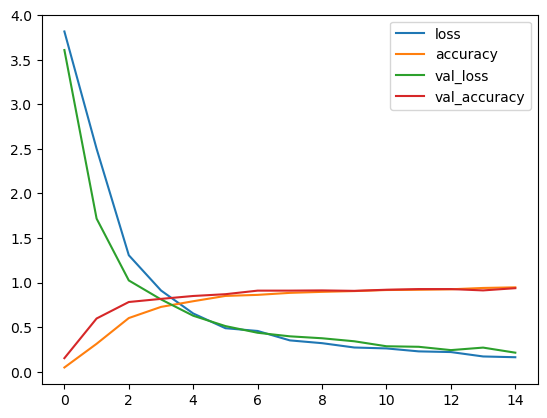

In [27]:
epoch_num = list(range(0, epochs))
plt.plot(epoch_num, history.history['loss'], label = 'loss')
plt.plot(epoch_num, history.history['accuracy'], label = 'accuracy')
plt.plot(epoch_num, history.history['val_loss'], label = 'val_loss')
plt.plot(epoch_num, history.history['val_accuracy'], label = 'val_accuracy')
plt.legend()
plt.show()

In [34]:
#Traing with the second splitting of the dataset
epochs_data2 = 10

history_2 = model.fit(train_dataset, validation_data=validation_dataset, epochs=epochs_data2)

Epoch 1/10
37/37 [==============================] - 10s 266ms/step - loss: 0.0762 - accuracy: 0.9730 - val_loss: 0.0343 - val_accuracy: 0.9922
Epoch 2/10
37/37 [==============================] - 10s 266ms/step - loss: 0.0503 - accuracy: 0.9848 - val_loss: 0.0149 - val_accuracy: 1.0000
Epoch 3/10
37/37 [==============================] - 10s 261ms/step - loss: 0.0516 - accuracy: 0.9780 - val_loss: 0.0211 - val_accuracy: 0.9961
Epoch 4/10
37/37 [==============================] - 11s 279ms/step - loss: 0.0649 - accuracy: 0.9797 - val_loss: 0.0296 - val_accuracy: 0.9922
Epoch 5/10
37/37 [==============================] - 10s 267ms/step - loss: 0.0818 - accuracy: 0.9688 - val_loss: 0.0294 - val_accuracy: 0.9961
Epoch 6/10
37/37 [==============================] - 10s 263ms/step - loss: 0.0633 - accuracy: 0.9772 - val_loss: 0.0248 - val_accuracy: 0.9922
Epoch 7/10
37/37 [==============================] - 10s 272ms/step - loss: 0.0519 - accuracy: 0.9840 - val_loss: 0.0391 - val_accuracy: 0.9922

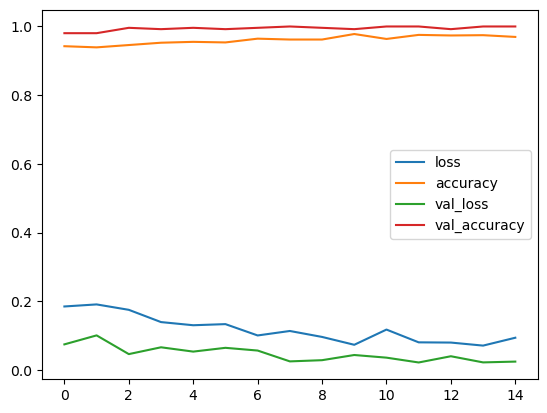

In [35]:
epoch_num = list(range(0, epochs))
plt.plot(epoch_num, history.history['loss'], label = 'loss')
plt.plot(epoch_num, history.history['accuracy'], label = 'accuracy')
plt.plot(epoch_num, history.history['val_loss'], label = 'val_loss')
plt.plot(epoch_num, history.history['val_accuracy'], label = 'val_accuracy')
plt.legend()
plt.show()

In [37]:
prediction = model.predict(test_dataset)

9/9 [==============================] - 2s 50ms/step


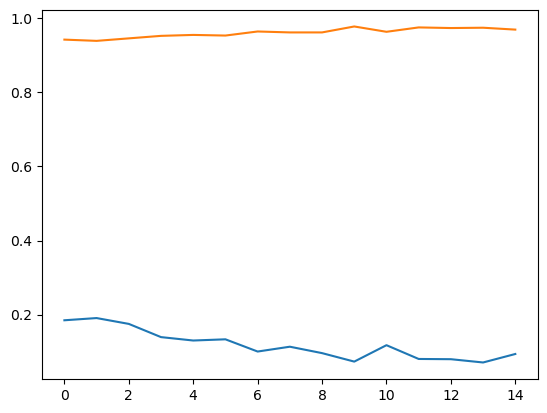

In [38]:
epoch_num = list(range(0, epochs))
plt.plot(epoch_num, history.history['loss'], label = 'loss')
plt.plot(epoch_num, history.history['accuracy'], label = 'accuracy')